# References:

https://d9w.github.io/evolution/2_ga/


Outline

    1. Genetic Algorithm Overview
    2. Initialization
    3. Evaluation
    4. Selection
    5. Mutation
    6. Crossover
    7. Putting it all together
    8. Elitism

# Genetic Algorithm Overview
The outline of an evolutionary algorithm is to start with an initial population and then to iterate through a cycle of evaluation, selection, and modification, passing the modified population on as the next generation.

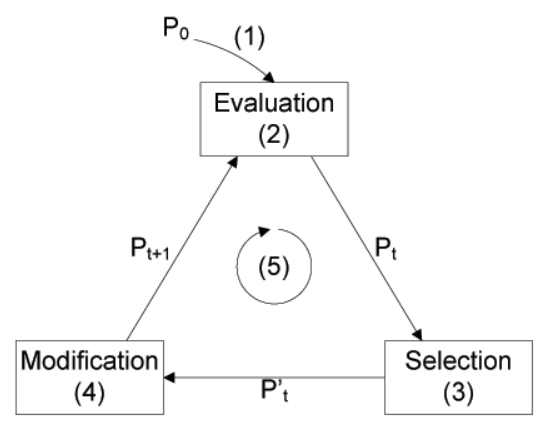

This is the underlying algorithm of a genetic algorithm. This term is general and can cover a variety of more specific algorithms such as NSGA-II and NEAT, but in this section we'll discuss a classic genetic algorithm.

\
The defining features of a classic genetic algorithm are a large population initialized at random and the mutation and crossover operators during the modification step. In a classic GA, we will use a selection method to randomly select two individuals from the population, combine them using crossover, mutate the resulting individual, and add it to the new population. We will repeat this until the new population is full. 

In [1]:
import numpy as np
import random
from dataclasses import dataclass
import matplotlib.pyplot as plt
import copy

In [2]:
# Making the base class
@dataclass
class Individual:
    genes : list
    fitness : float

In [3]:
def step_ga(population: [Individual]):
    evaluate(population)
    max_fit = max([i.fitness for i in population])
    
    new_population = []
    while len(new_population) < len(population):
        parent1 = select(population)
        parent2 = select(population)
        child1 = crossover(parent1, parent2)
        child1 = mutate(child1)
        new_population.append(child1)
        
    return new_population, max_fit

We've defined a single step of the genetic algorithm and can fill in the functions later. Let's now define the full evolution, keeping track of the maximum fitness in the population at each step.

In [4]:
def ga(n_generations:int):
    population = initialize()
    fits = np.zeros(n_generations)
    
    for index in range(n_generations):
        population, max_fit = step_ga(population)
        fits[index] = max_fit
        
    return fits

# Initialization
Let's define our two Individual types for now.

In [5]:
def BitIndividual(n:int):
    return Individual([random.getrandbits(1) for _ in range(n)], 0)

def FloatIndividual(n:int):
    return Individual([random.random() for _ in range(n)], 0)

In [6]:
# test
BitIndividual(5)

Individual(genes=[0, 0, 1, 1, 1], fitness=0)

In [7]:
# test
FloatIndividual(5)

Individual(genes=[0.005850090801386321, 0.5781716331550559, 0.5549674451165124, 0.23209307518868416, 0.9130935267363779], fitness=0)

 Let's create population initialization methods for these two types.

In [8]:
def bit_initialize(population_size: int, n_genes:int):
    return [BitIndividual(n_genes) for _ in range(population_size)]

def float_initialize(population_size: int, n_genes:int):
    return [FloatIndividual(n_genes) for _ in range(population_size)]

In [9]:
# test
bit_initialize(5, 15)

[Individual(genes=[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], fitness=0),
 Individual(genes=[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], fitness=0),
 Individual(genes=[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], fitness=0),
 Individual(genes=[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], fitness=0),
 Individual(genes=[0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], fitness=0)]

In [10]:
# test
float_initialize(5, 3)

[Individual(genes=[0.1517647452451627, 0.6312989046502777, 0.6595372843552246], fitness=0),
 Individual(genes=[0.4885642906306624, 0.21338177172477046, 0.28999487892750186], fitness=0),
 Individual(genes=[0.5427960950881814, 0.8585665444224797, 0.6902895020106607], fitness=0),
 Individual(genes=[0.06985010873859554, 0.6882388220808824, 0.8110994598857514], fitness=0),
 Individual(genes=[0.9170747521769809, 0.594146173312752, 0.7967917818855091], fitness=0)]


# Evaluation

The first part of the genetic algorithm step is the evaluation. We'll look at two evaluation functions, one for our binary individual type, and one for the floating point individuals.

Looking at our genetic algorithm implementation, we use an evaluate function to evaluate the entire population. Let's write that general function.


In [11]:
def evaluate(population: [Individual], objective):
    for each in population:
        each.fitness = objective(each)

In [12]:
def objective_onemax(ind: BitIndividual):
    return sum(ind.genes)

In [13]:
# test

population = bit_initialize(10, 5)
evaluate(population, objective_onemax)
print([each.fitness for each in population])

[1, 2, 3, 0, 1, 2, 2, 4, 4, 2]


For a floating point problem, let's look at something a bit more difficult than the sphere problem. Specifically, we'll use the Rastrigin function.

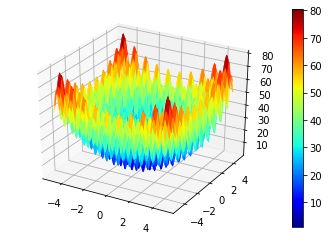

In [14]:
def rastrigin(x):
    x = np.array(x)
    return 10 * len(x) + sum(x**2 - 10 * np.cos(2 * np.pi * x))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x,y)

fz = rastrigin(np.array([X,Y]))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fz, cmap=cm.jet)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(fz)
fig.colorbar(m)

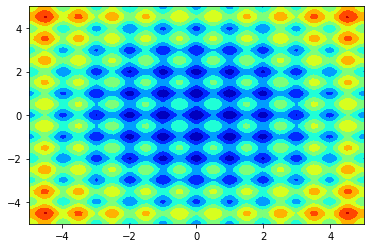

In [15]:
plt.contourf(X,Y,fz,cmap=cm.jet)

Using varying Rastrigin inspired from BlackBoxOptimizationBenchmarking

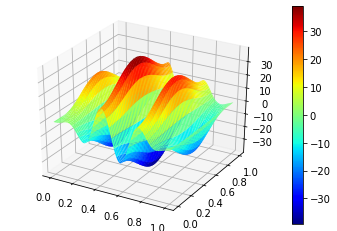

In [16]:
def rast(x):
    return rastrigin(x) * np.sin(6 * np.pi * x[0])

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x,y)

fz = rast(np.array([X,Y]))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fz, cmap=cm.jet)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(fz)
fig.colorbar(m)

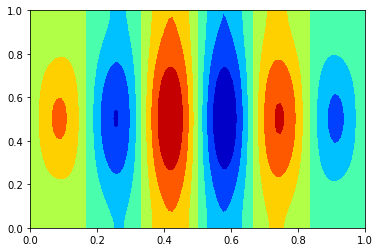

In [17]:
plt.contourf(X,Y,fz,cmap=cm.jet)

In [18]:
def objective_rastrigin(ind: FloatIndividual):
    return rast(ind.genes)

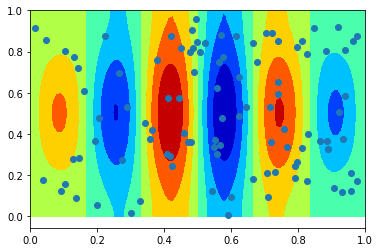

In [19]:
population = float_initialize(100, 10)
xs = [ind.genes[1] for ind in population]
ys = [ind.genes[2] for ind in population]
plt.contourf(X,Y,fz,cmap=cm.jet)
plt.scatter(xs,ys)

As we can see, having a large population of individuals means we have a chance of already starting out in a good position. However, some others might be in local maxima - points which are higher than the areas around them, but not the global maximum. These points can be deceptive if we tend to select only the individuals in high points. What we want to do with selection in a genetic algorithm is maintain diversity while moving towards the global maximum. Let's see how we can do that.

Visualize some of the other functions from the BBOB set. Why do you think the Rastrigin function is more difficult than the sphere function? Is there any other function which looks more difficult? 

# Exercise 1
Visualize some of the other functions from the BBOB set. Why do you think the Rastrigin function is more difficult than the sphere function? Is there any other function which looks more difficult? 


# Selection

Which individuals should pass on their genetic information to the next generation? We could imagine a simple schemes of taking the best individuals globally, say 20% of them, and mutating each of these experts for the next generation. In a simple problem like this one, such a method might work. However, we would lose important genetic diversity, one of the main advantages of our large population. Let's explore some different selection methods. To do so, we'll need to evaluate all individuals.

For this first proposed method of taking the top individuals, which is called truncation selection, we'll need to order them using sort method.

In [20]:
def isless(ind1:Individual, ind2:Individual):
    return ind1.fitness < ind2.fitness

In [21]:
# test

evaluate(population, objective_rastrigin)
print(population[1])
print(population[2])
isless(population[1], population[2])

Individual(genes=[0.4611648634494301, 0.7076049812945553, 0.20775420643606057, 0.38152438860760574, 0.5784421915659453, 0.09453738604452766, 0.561878237775908, 0.9129915349474693, 0.4521623413897856, 0.6419199970058671], fitness=91.6649448257621)
Individual(genes=[0.3003958727988738, 0.7102308926788288, 0.09134816432461745, 0.04730542091067724, 0.022725436652137998, 0.5658994195869135, 0.29253708253426414, 0.6528515319907936, 0.7219922393398421, 0.6841528666451733], fitness=-60.18328899487115)


False

Now that we have a way of comparing individuals, we can order lists of them using the sort function. We'll sort from biggest to smallest to have the best individuals at the beginning of the population.

In [22]:
population = float_initialize(100, 5)
evaluate(population, objective_rastrigin)
fits = [ind.fitness for ind in population]
print(f"First : {population[0].fitness} | Last : {population[-1].fitness}")
print(f"Max : {max(fits)} | Last : {min(fits)}")

First : -34.67383439269053 | Last : 29.317783011442327
Max : 82.22373242383529 | Last : -81.13054908508337


In [23]:
#sorted(population, key = lambda ind : ind.fitness ,reverse=True)
population.sort(key = lambda ind : ind.fitness ,reverse=True)
print(f"First : {population[0].fitness} | Last : {population[-1].fitness}")
print(f"Max : {max(fits)} | Last : {min(fits)}")

First : 82.22373242383529 | Last : -81.13054908508337
Max : 82.22373242383529 | Last : -81.13054908508337


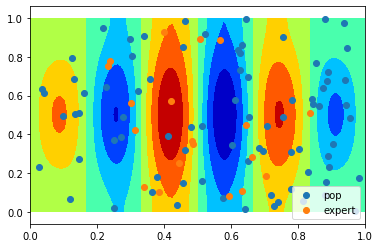

In [24]:
xs = [ind.genes[1] for ind in population]
ys = [ind.genes[2] for ind in population]
plt.contourf(X,Y,fz,cmap=cm.jet)
plt.scatter(xs[20:],ys[20:], label="pop")
plt.scatter(xs[:19],ys[:19], label="expert")
plt.legend(loc="lower right")



As we can see, using this selection method, we risk optimizing towards local maxima, especially if we completely discard the rest of the population. Let's look at other selection methods for now, and we'll keep truncation selection in mind for later.

We will instead assign a probability to each individual based on their fitness. This is known as fitness proportionate selection. Specifically, we will use the probability

$p_i = \frac{f_i}{\sum\limits_{j=1}^N f_j}$

The probability is each fitness divided by the sum. 

In [25]:
fits = [ind.fitness for ind in population]

In [26]:
probability = fits / sum(fits)

(array([ 3.,  8., 14., 10., 11.,  9., 19., 16.,  7.,  3.]),
 array([-0.31156126, -0.2488292 , -0.18609714, -0.12336507, -0.06063301,
         0.00209905,  0.06483111,  0.12756317,  0.19029523,  0.25302729,
         0.31575935]),
 <a list of 10 Patch objects>)

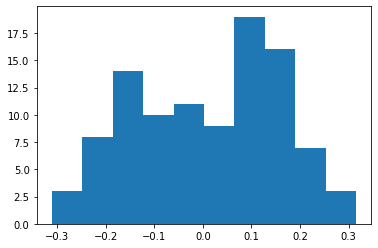

In [27]:
plt.hist(probability)

In [28]:
def sample(population, probability=None, k=1):
    if k == 1:
        return (random.choices(population, weights=None, k=k))[0]
    return random.choices(population, weights=None, k=k)

# test
sample(population, probability)

Individual(genes=[0.8108970764624417, 0.7818728562872957, 0.5770395681770096, 0.324383503131662, 0.938502196301456], fitness=20.914460593081593)

Let's write this according to the select function definition we used before, which takes in the population and gives out a single individual.

In [29]:
def fp_select(population):
    fits = [ind.fitness for ind in population]
    probability = fits / sum(fits)
    return sample(population, probability)

# test
fp_select(population)

Individual(genes=[0.9576505901727255, 0.6041604853349957, 0.34457142056869194, 0.3666959341425522, 0.3410854082789302], fitness=-48.44331775995663)

Does this perform better than our previous method? Let's select 20 individuals using this method.

In [30]:
selected = []

for _ in range(20):
    sampled = fp_select(population)
    selected += [(sampled)]

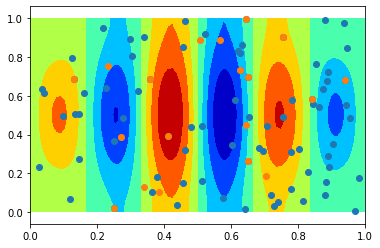

In [31]:
sxs = [ind.genes[1] for ind in selected]
sys = [ind.genes[2] for ind in selected]
xs = [ind.genes[1] for ind in population]
ys = [ind.genes[2] for ind in population]

plt.contourf(X,Y,fz,cmap=cm.jet)
plt.scatter(xs[20:],ys[20:], label="pop")
plt.scatter(sxs,sys, label="fp_expert")
#plt.legend(loc="lower right")

As we can see here, individuals are not only found in local maxima but throughout the search space, which is good for diversity. The last selection method we'll use is called tournament selection. This method creates small random tournaments and selects the winner from this smaller subset for every new individual. We'll use a tournament size of 3, so we'll randomly select 3 individuals and then return the best individual from those 3.

In [32]:
def tournament_select(population):
    tournament_size = 3
    tournament = sample(population, k=tournament_size)
    tournament.sort(key=lambda ind : ind.fitness, reverse=True)
    return tournament[0]

# test
tournament_select(population)

Individual(genes=[0.45524729607380954, 0.11994987973193771, 0.06738677326705056, 0.20022191462448347, 0.7465203523789657], fitness=30.750141214672347)

Let's look at 20 selections from the tournament selection method and compare it to the fitness proportionate method.

In [33]:
winners = []

for _ in range(20):
    winners.append(tournament_select(population))
    
winners

[Individual(genes=[0.45524729607380954, 0.11994987973193771, 0.06738677326705056, 0.20022191462448347, 0.7465203523789657], fitness=30.750141214672347),
 Individual(genes=[0.3709184045188785, 0.4827029272414791, 0.36834505858867705, 0.4036558989964635, 0.6471166019805061], fitness=57.865192340017245),
 Individual(genes=[0.6415671227519122, 0.3395562442436001, 0.9063355479537675, 0.22214338631607, 0.8543430592775619], fitness=-21.6917339704762),
 Individual(genes=[0.8108970764624417, 0.7818728562872957, 0.5770395681770096, 0.324383503131662, 0.938502196301456], fitness=20.914460593081593),
 Individual(genes=[0.0025688118739133348, 0.45689810522168894, 0.1514228185791907, 0.5966628213680137, 0.33985950036633994], fitness=2.812022233284114),
 Individual(genes=[0.39744444147274094, 0.5945969084501359, 0.08462593842401489, 0.681026456195392, 0.7532213366072121], fitness=59.1033426143545),
 Individual(genes=[0.7183695155510966, 0.30007278876894683, 0.5618976207453329, 0.6102127941697187, 0.4

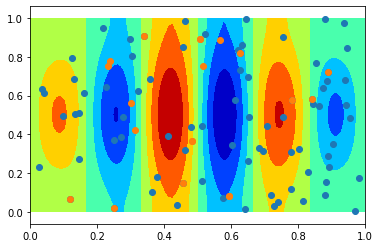

In [34]:
wxs = [ind.genes[1] for ind in winners]
wys = [ind.genes[2] for ind in winners]
xs = [ind.genes[1] for ind in population]
ys = [ind.genes[2] for ind in population]

plt.contourf(X,Y,fz,cmap=cm.jet)
plt.scatter(xs[20:],ys[20:], label="pop")
plt.scatter(wxs,wys, label="tournament")
#plt.legend(loc="lower right")

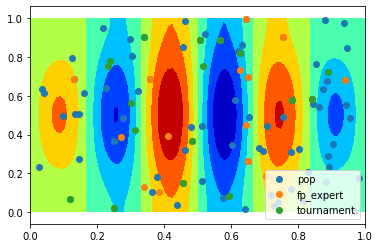

In [35]:
sxs = [ind.genes[1] for ind in selected]
sys = [ind.genes[2] for ind in selected]
wxs = [ind.genes[1] for ind in winners]
wys = [ind.genes[2] for ind in winners]
xs = [ind.genes[1] for ind in population]
ys = [ind.genes[2] for ind in population]

plt.contourf(X,Y,fz,cmap=cm.jet)
plt.scatter(xs[20:],ys[20:], label="pop")
plt.scatter(sxs,sys, label="fp_expert")
plt.scatter(wxs,wys, label="tournament")
plt.legend(loc="lower right")

**Plot the histogram of fitness values of 100 selected individuals using these two methods, and using a larger n value. How do the distributions from the two methods compare? Try it also for a population of binary individuals on the OneMax function. Finally, try increasing the tournament size. What effect does that have on the selected individuals' fitness distribution?**

The distribution would be normal distribution

# Exercise 2
Plot the histogram of fitness values of 100 selected individuals using these two methods, and using a larger n value. How do the distributions from the two methods compare? Try it also for a population of binary individuals on the OneMax function. Finally, try increasing the tournament size. What effect does that have on the selected individuals' fitness distribution? 


# Mutation

For this genetic algorithm, we'll simply reuse the functions from evolutionary algorithm. We will flip the gene bit for binary individuals and use rand for floating point individuals.


In [36]:
def mutate_bit(ind):
    mutation_rate = 1.0/len(ind.genes)
    new_genes = list(ind.genes)
    
    for i, _ in enumerate(new_genes):
        if random.rand() < mutation_rate:
            new_genes[i] = ~ind.genes[i] & 1
            
    return BitIndividual(new_genes, 0)
    
def mutate_float(ind):
    mutation_rate = 1.0/len(ind.genes)
    new_genes = list(ind.genes)
    
    for i, _ in enumerate(new_genes):
        if random.random() < mutation_rate:
            new_genes[i] = random.random()
            
    return Individual(new_genes, 0)
    
    
# test
print(population[0])
print(mutate_float(population[0]))

Individual(genes=[0.40987865170642934, 0.6641612451400182, 0.2826189667475669, 0.36024140273513416, 0.5315546645261409], fitness=82.22373242383529)
Individual(genes=[0.40987865170642934, 0.9965208530500996, 0.5241708565831406, 0.36024140273513416, 0.5315546645261409], fitness=0)



# Crossover

Considering we have such a large population, is there some way to combine individual solutions to lead to better solutions? For example, could we make an individual which inherits information from two parent individuals? This is the idea behind crossover, the other operator in genetic algorithms besides mutation. It is based on sexual reproduction where the genetic information of two parent individuals is mixed to create an offspring individual. The idea of combining the information from multiple individuals together to create the next generation is something we'll explore in more detail next class when discussing evolutionary strategies. For now, let's look at ways to combine two individuals.

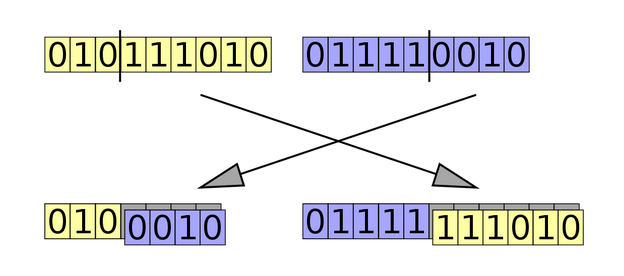

The first methods we'll look at is single-point crossover. Here, the child genes are composed of two continuous sections, the first from one parent and the second from the other parent.


In [37]:
def one_point_crossover(parent1:Individual, parent2:Individual):
    child = copy.deepcopy(parent1)
    n = random.randint(0, len(parent2.genes))
    child.genes[n:] = copy.deepcopy(parent2.genes[n:])
    return child
    
# test
print(population[0])
print(population[1])
child = one_point_crossover(population[0], population[1])
child

Individual(genes=[0.40987865170642934, 0.6641612451400182, 0.2826189667475669, 0.36024140273513416, 0.5315546645261409], fitness=82.22373242383529)
Individual(genes=[0.7183695155510966, 0.30007278876894683, 0.5618976207453329, 0.6102127941697187, 0.4364023653569794], fitness=68.44407459696914)


Individual(genes=[0.40987865170642934, 0.6641612451400182, 0.5618976207453329, 0.6102127941697187, 0.4364023653569794], fitness=82.22373242383529)

This is most useful when sequential sections of a genome should be passed together, which is the case in biological evolution but not always necessary in artificial evolution. This method is also the basis of k-point crossover, which follows the same method but splits at k points, alternating between parents at each crossing point. Note that this method can generate two children at once, but for the sake of coherence we'll just use the first child.




The second crossover method we'll look at is uniform crossover, which randomly chooses a different parent for each gene.

In [38]:
def uniform_crossover(parent1:Individual, parent2:Individual):
    child = copy.deepcopy(parent1)
    
    for i, _ in enumerate(child.genes):
        if random.random() < 0.5:
            child.genes[i] = parent2.genes[i]
            
    return child

# test
print(population[0])
print(population[1])
child = uniform_crossover(population[0], population[1])
child

Individual(genes=[0.40987865170642934, 0.6641612451400182, 0.2826189667475669, 0.36024140273513416, 0.5315546645261409], fitness=82.22373242383529)
Individual(genes=[0.7183695155510966, 0.30007278876894683, 0.5618976207453329, 0.6102127941697187, 0.4364023653569794], fitness=68.44407459696914)


Individual(genes=[0.40987865170642934, 0.6641612451400182, 0.2826189667475669, 0.36024140273513416, 0.5315546645261409], fitness=82.22373242383529)

# Exercise 3
Which crossover method do you expect to work better for the OneMax problem? What about for the Rastrigin function? Explain your reasoning. 


# Putting it all together




In [39]:
def step_ga(population, objective):
    evaluate(population, objective)
    max_fit = max([ind.fitness for ind in population])
    
    new_population = []
    
    while len(new_population) < len(population):
        parent1 = select(population)
        parent2 = select(population)

        child = crossover(parent1, parent2)
        child = mutate(child)
        
        new_population.append(child)
        
    return new_population, max_fit

In [40]:
def ga(n_generations: int, objective, population_size: int = 100, gene_size: int = 10):
    population = initialize(population_size, gene_size)
    
    for i in range(n_generations):
        population, max_fit = step_ga(population, objective)
        fits[i] = max_fit
        
    return fits



We need to define our function choices for initialize, select, and crossover. Let's focus on the Rastrigin function and use uniform crossover. We'll compare the two selection methods, starting with fitness proporitionate selection.


In [41]:
# fp - fitness proportionate test

initialize = float_initialize
crossover = uniform_crossover
select = fp_select
mutate = mutate_float

trials = 10
n_generations = 100
fits_fp = np.zeros((trials, n_generations))

for i in range(trials):
    fits_fp[i,:] = ga(n_generations, objective_rastrigin)

print(fits_fp[:, -1])

[131.37626168 129.44990583 111.61110756 150.86398537 130.20971731
 149.36048277 156.76558484 134.02129212 133.45314512 119.3149785 ]


In [42]:
# Tournament selection test

initialize = float_initialize
crossover = uniform_crossover
select = tournament_select
mutate = mutate_float

trials = 10
n_generations = 100
fits_tourney = np.zeros((trials, n_generations))

for i in range(trials):
    fits_tourney[i,:] = ga(n_generations, objective_rastrigin)

print(fits_tourney[:, -1])

[200.07152929 199.52441338 200.63816416 200.24277301 200.01973332
 199.67265115 200.39112205 200.34031961 199.4586477  200.33810599]


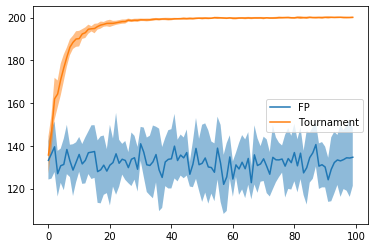

In [43]:
μ_fp = np.mean(fits_fp, axis=0)
σ_fp = np.std(fits_fp, axis=0)
μ_tourney = np.mean(fits_tourney, axis=0)
σ_tourney = np.std(fits_tourney, axis=0)
plt.plot(μ_fp, label="FP")
plt.fill_between(range(0,n_generations), μ_fp-σ_fp, μ_fp+σ_fp, alpha=0.5)
plt.plot(μ_tourney, label="Tournament")
plt.fill_between(range(0,n_generations), μ_tourney-σ_tourney, μ_tourney+σ_tourney, alpha=0.5)
plt.legend(loc="center right")



While the randomness of tournament selection may appear disadvantageous, the diversity it provides in the search allows us to continue looking through new areas where we might get stuck with fitness proportionate selection. Tournament selection also gaurantees improvement by selecting individuals that are at least better than two other individuals in the population, while fitness proportionate selection may randomly choose bad individuals often.

Our results seem to fluctuate quite a bit. Why is that? We didn't see that before with the (1+1)
and (1+λ) EAs...


# Elitism

An advantage that the (1+1)
and (1+λ) EAs have over the genetic algorithm we've coded here is that their convergence is monotonically increasing. This means as evolution goes on, the result will only improve and never get worse. This is because the best fitness is only ever removed when the expert is replaced by an equally good or better individual. However, neither of the selection methods we compared have this guarantee: the best individual can leave the population easily! While completely basing our selection on global competition may not be a good practice, we do want to keep at least the best individual. This is known as elitism and is the practice of directly passing on a certain number of individuals without mutation into the next generation. This is similar to the truncation selection we used at the beginning, but the individuals selected from truncation selection will bypass the modification step entirely.

In [44]:
num_elites = 5

def step_ga(population, objective):
    evaluate(population, objective)
    population.sort(key=lambda ind: ind.fitness, reverse=True)
    max_fit = max([ind.fitness for ind in population])
    
    new_population = []
    new_population += population[0:num_elites]
    
    while len(new_population) < len(population):
        parent1 = select(population)
        parent2 = select(population)

        child = crossover(parent1, parent2)
        child = mutate(child)
        
        new_population.append(child)
        
    return new_population, max_fit

In [45]:
# fp - fitness proportionate test

initialize = float_initialize
crossover = uniform_crossover
select = fp_select
mutate = mutate_float

trials = 10
n_generations = 100
fits_fp = np.zeros((trials, n_generations))

for i in range(trials):
    fits_fp[i,:] = ga(n_generations, objective_rastrigin)

print(fits_fp[:, -1])

[194.99091287 185.93834898 196.43531728 196.50567063 193.66653315
 193.80719238 193.26710679 192.05784273 198.98664288 196.48203019]


In [46]:
# Tournament selection test

initialize = float_initialize
crossover = uniform_crossover
select = tournament_select
mutate = mutate_float

trials = 10
n_generations = 100
fits_tourney = np.zeros((trials, n_generations))

for i in range(trials):
    fits_tourney[i,:] = ga(n_generations, objective_rastrigin)

print(fits_tourney[:, -1])

[200.93940269 201.04944581 201.00327192 200.02231737 200.93023556
 200.55915374 201.06610312 200.93271819 200.62584304 201.06399943]


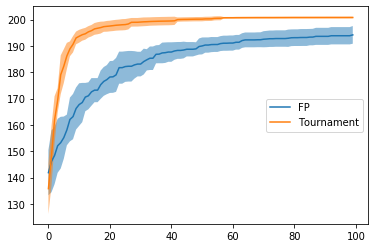

In [47]:
μ_fp = np.mean(fits_fp, axis=0)
σ_fp = np.std(fits_fp, axis=0)
μ_tourney = np.mean(fits_tourney, axis=0)
σ_tourney = np.std(fits_tourney, axis=0)
plt.plot(μ_fp, label="FP")
plt.fill_between(range(0,n_generations), μ_fp-σ_fp, μ_fp+σ_fp, alpha=0.5)
plt.plot(μ_tourney, label="Tournament")
plt.fill_between(range(0,n_generations), μ_tourney-σ_tourney, μ_tourney+σ_tourney, alpha=0.5)
plt.legend(loc="center right")

# Exercise 4

We now have many parameter choices: population size, mutation rate, tournament size if using tournament selection, crossover function, number of elites. Using a maximum of 10000 evaluations (ie 100 generations with a population of 100), compare these parameter choices. What is the best value you can reach with n=10? Do the parameter results you get generalize to higher values of n? The best value should include the average and standard deviation over multiple runs. 

# Exercise 5

Run the same analysis for the binary problem OneMax. Compare this result to the (1+1) and (1+λ) EAs. Which method is the best? 